In [295]:
from netCDF4 import Dataset
from os import scandir
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [412]:
def ls_(path): 
    return [obj.name for obj in scandir(path) if obj.is_file()]

def ncdf_to_gif(File):
    rootgrp = Dataset(File, "r", format="NETCDF4")
    Time = {}
    Time["start"] = rootgrp.time_coverage_start
    Time["end"] = rootgrp.time_coverage_end
    Time["create"] = rootgrp.date_created

    geospatial = {}
    geospatial["lat_min"] = rootgrp.geospatial_lat_min
    geospatial["lat_max"] = rootgrp.geospatial_lat_max
    geospatial["lon_min"] = rootgrp.geospatial_lon_min
    geospatial["lon_max"] = rootgrp.geospatial_lon_max

    AERO_340_380_precision = rootgrp.groups['PRODUCT'].variables['aerosol_index_340_380_precision'][:].data[0]
    AERO_340_380 = rootgrp.groups['PRODUCT'].variables['aerosol_index_340_380'][:].data[0]
    AERO_354_388_precision = rootgrp.groups['PRODUCT'].variables['aerosol_index_354_388_precision'][:].data[0]
    AERO_354_388 = rootgrp.groups['PRODUCT'].variables['aerosol_index_354_388'][:].data[0]

    latitude  = rootgrp.groups['PRODUCT'].variables['latitude'][:].data[0]
    longitude = rootgrp.groups['PRODUCT'].variables['longitude'][:].data[0]
    
    

    df = pd.DataFrame(
    {'Data' : np.hstack(AERO_340_380),
     'Presicion' : np.hstack(AERO_340_380_precision),
     'Latitude': np.hstack(latitude),
     'Longitude': np.hstack(longitude)
    })


    gdf = geopandas.GeoDataFrame( df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
    gdf = gdf[gdf.Latitude > -5]
    gdf = gdf[gdf.Latitude < 12]
    gdf = gdf[gdf.Longitude > -80]
    gdf = gdf[gdf.Longitude < -66]

    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    # We restrict to South America.


    fig, axx = plt.subplots(1)

    ax = world[world.name == "Colombia"].boundary.plot(
        color='black', edgecolor='black', figsize= (15,12),zorder=2)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="6%", pad=0.1)

    axx = gdf.plot(column='Data', ax=ax,  legend=True, cax=cax,zorder=1,cmap='gnuplot')
    axx.set_axis_off()

    axx.set_title(rootgrp.time_coverage_end )
    axx.tick_params(labelsize=20)



    #plt.show()
    plt.savefig(fname= rootgrp.time_coverage_end.replace("-", "").replace(":", ""))
    plt.close()
    print(rootgrp.time_coverage_end)
    
    
files=ls_("C:/Users/IN2Sense/Documents/RACIMO/RACIMOAIRE/Datos_satelites_202001_202003")
files = [i for i in files if(i[::-1][:4] == "fdcn")]




2020-02-13T18:37:59Z
2020-02-13T18:42:59Z
2020-02-14T18:18:00Z
2020-02-14T18:22:59Z
2020-02-15T17:59:05Z
2020-02-15T18:04:06Z
2020-02-15T18:09:06Z
2020-02-16T17:44:05Z
2020-02-16T17:49:05Z
2020-02-16T19:24:05Z
2020-02-16T19:29:05Z
2020-02-17T17:24:05Z
2020-02-17T17:29:05Z
2020-02-17T19:04:05Z
2020-02-17T19:09:05Z
2020-02-18T17:09:05Z
2020-02-18T18:44:06Z
2020-02-18T18:49:06Z
2020-02-19T18:24:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-19T18:29:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-19T18:34:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-20T18:09:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-20T18:14:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-21T17:49:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-21T17:54:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-21T19:29:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-21T19:34:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-22T17:29:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-22T17:34:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-22T19:09:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-22T19:14:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-23T17:14:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-23T17:19:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-23T18:54:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-23T18:59:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-24T18:34:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-24T18:39:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-25T18:14:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-25T18:19:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-26T17:54:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-26T17:59:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-26T19:39:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-27T17:39:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-27T17:44:05Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-27T19:19:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-27T19:24:06Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-28T17:19:56Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-28T17:24:56Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-28T18:59:56Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-28T19:04:55Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-29T18:41:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-02-29T18:46:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-01T18:21:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-01T18:26:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-02T18:01:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-02T18:06:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-03T17:41:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-03T17:46:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-03T19:26:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-04T17:26:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-04T17:31:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-04T19:06:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-04T19:11:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-05T17:06:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-05T17:11:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-05T18:46:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-05T18:51:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-06T18:26:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-06T18:31:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-07T18:06:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-07T18:11:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-08T17:51:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-08T17:56:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-08T19:31:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-09T17:31:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-09T17:36:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-09T19:11:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-09T19:16:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-10T17:11:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-10T17:16:11Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-10T18:51:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-10T18:56:12Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-11T18:35:01Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-11T18:40:01Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-12T18:15:02Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-12T18:20:02Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-13T17:55:02Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-13T18:00:02Z


C:\Users\IN2Sense\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\IN2Sense\Anaconda3\lib\site-packages\geopandas\plotting.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


2020-03-13T19:40:01Z


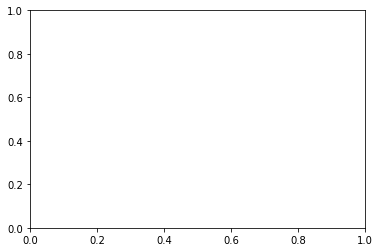

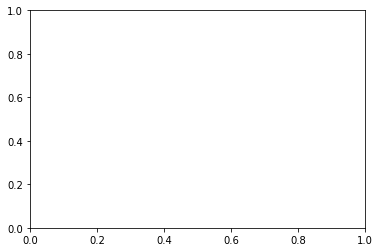

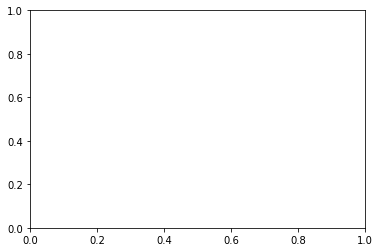

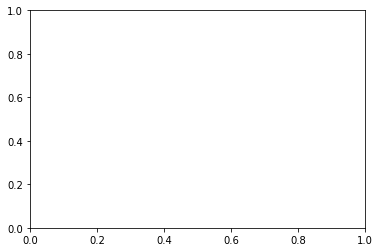

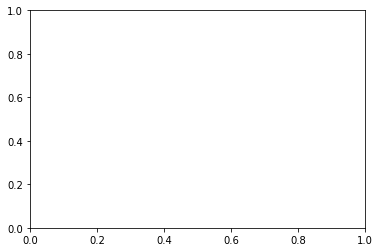

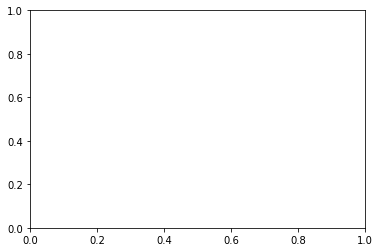

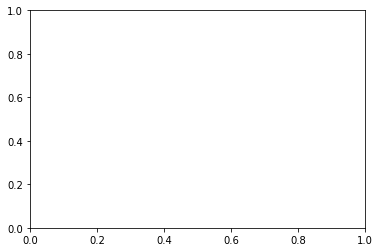

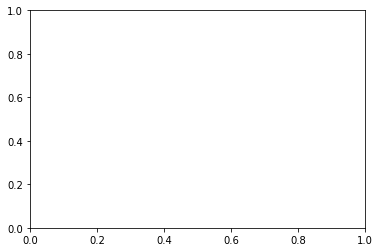

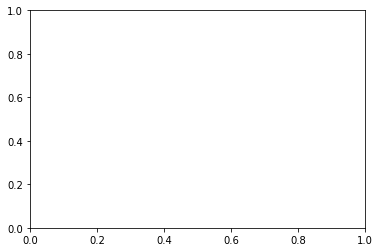

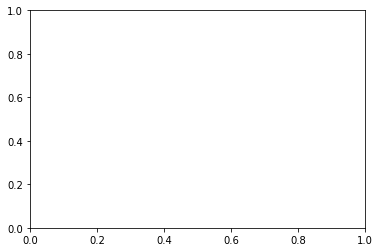

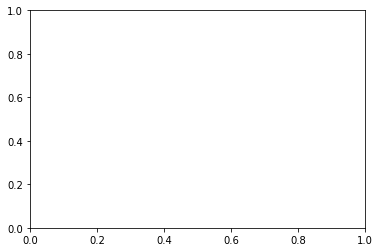

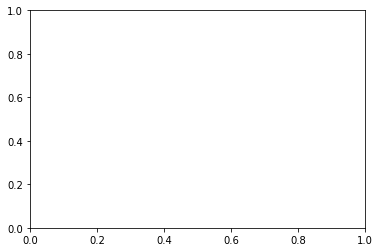

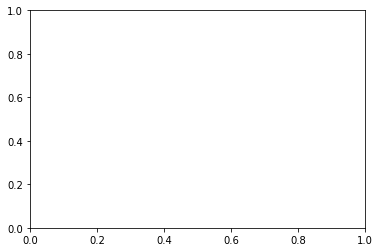

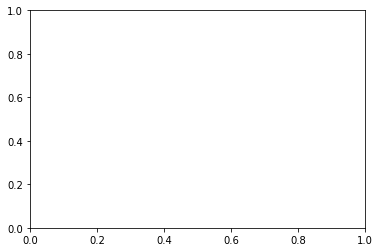

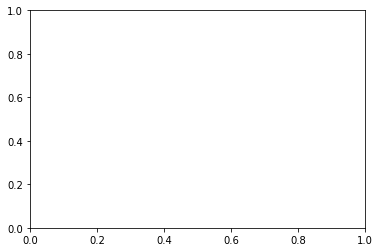

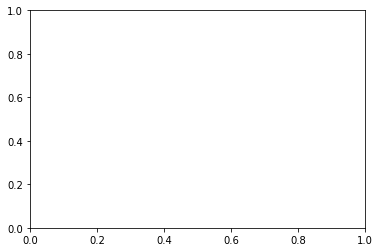

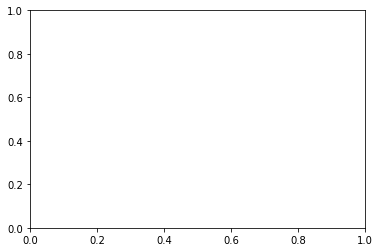

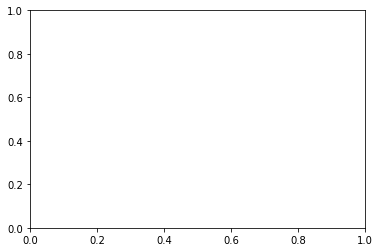

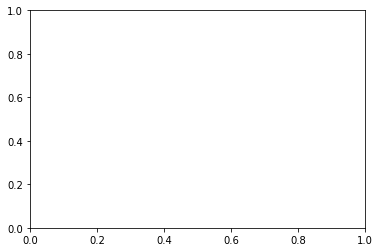

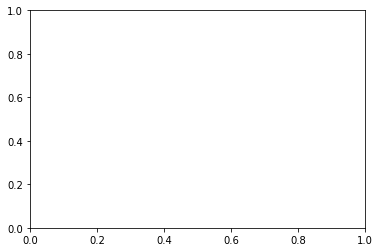

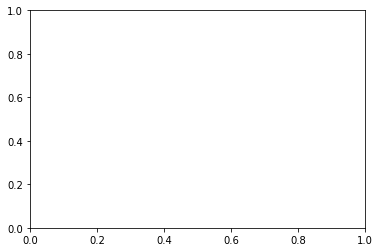

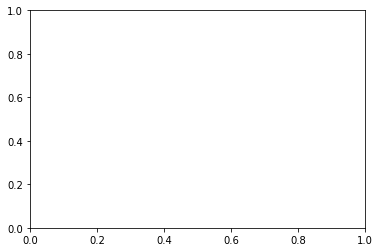

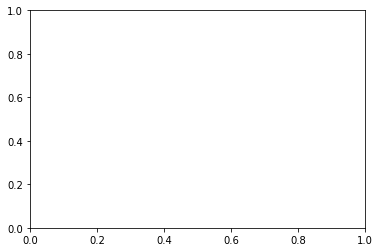

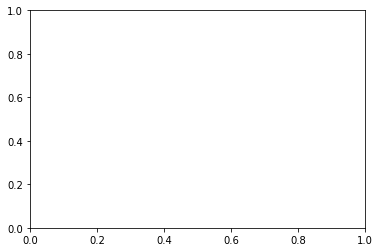

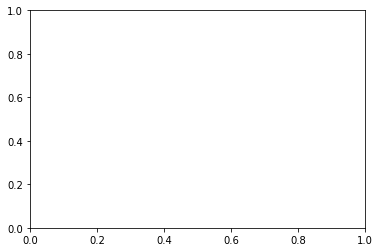

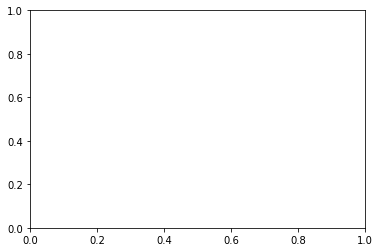

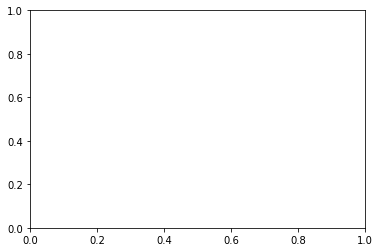

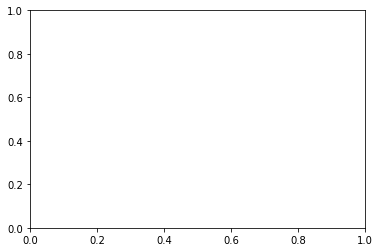

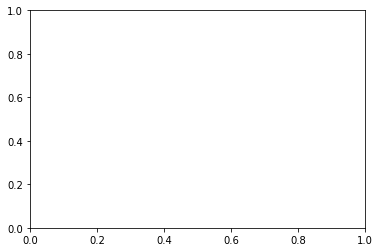

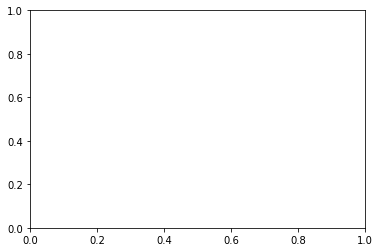

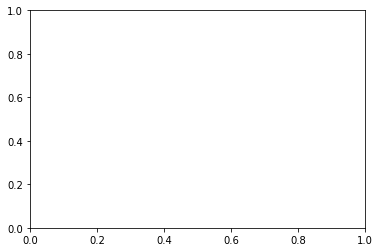

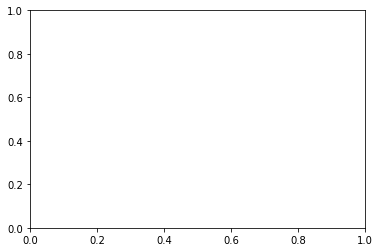

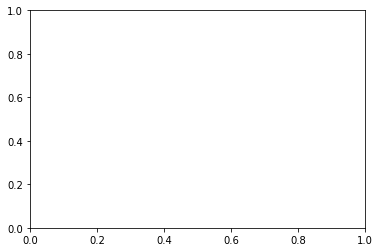

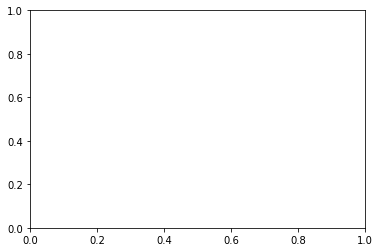

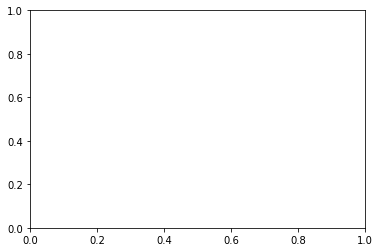

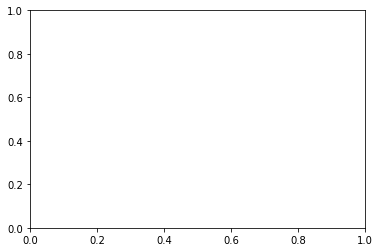

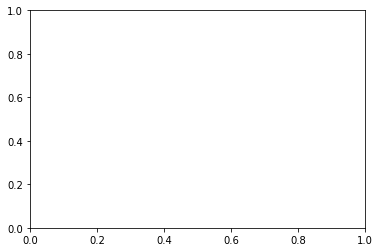

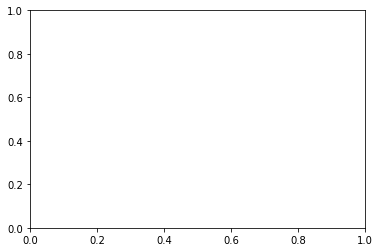

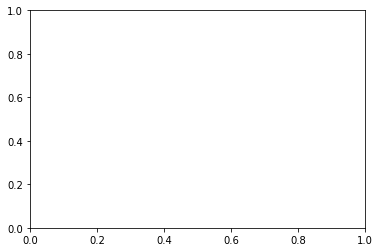

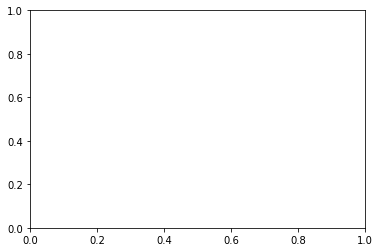

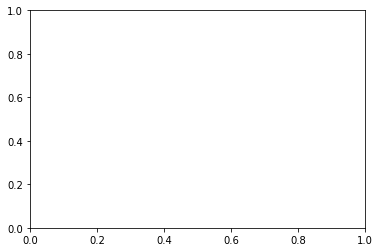

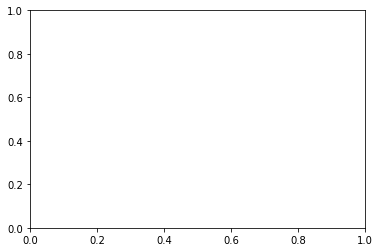

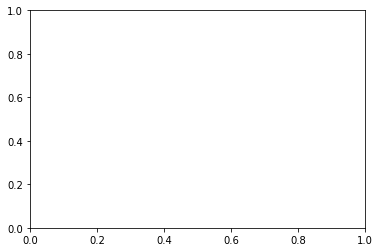

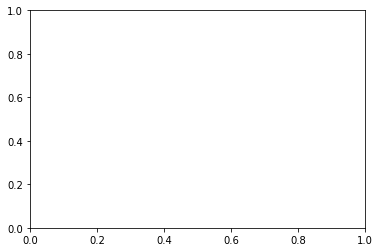

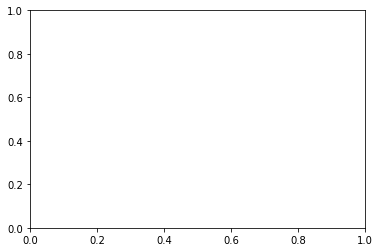

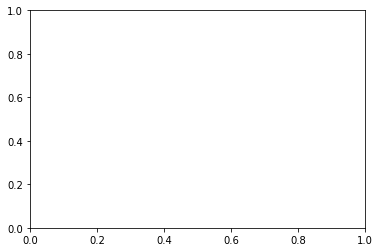

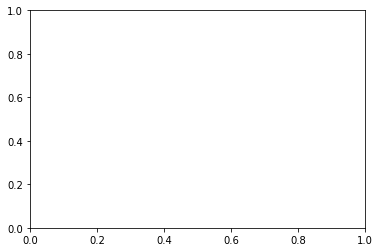

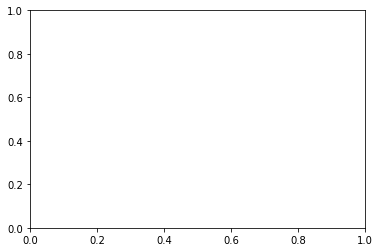

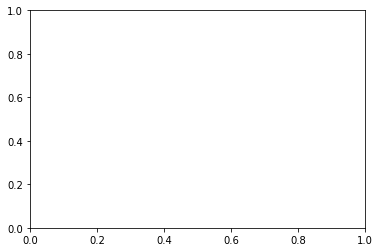

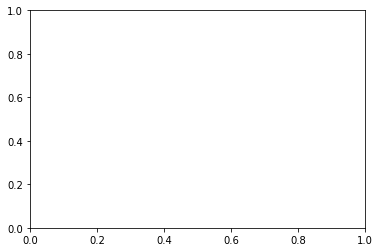

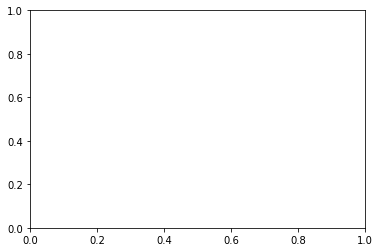

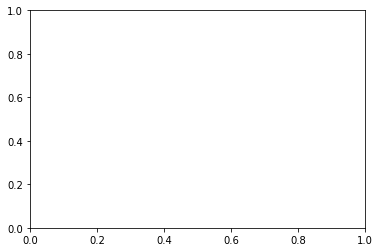

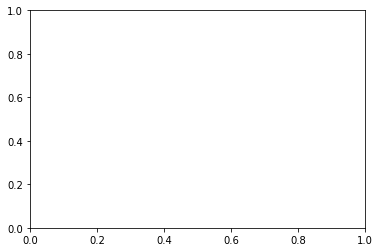

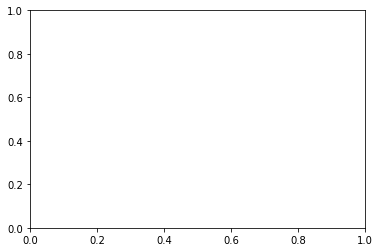

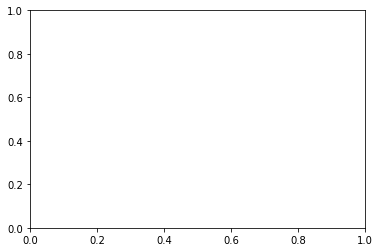

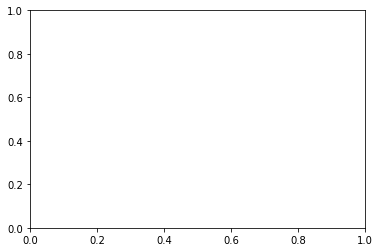

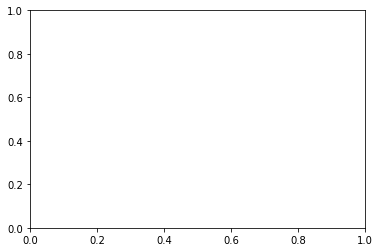

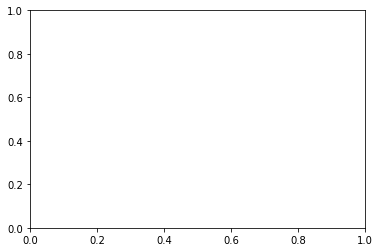

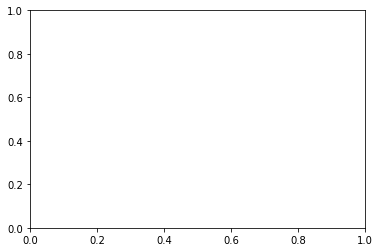

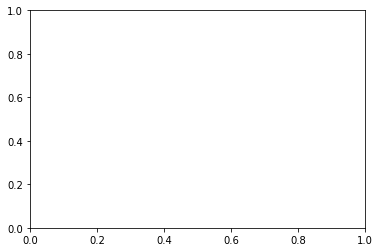

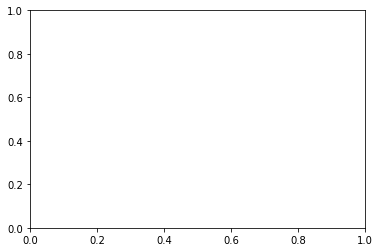

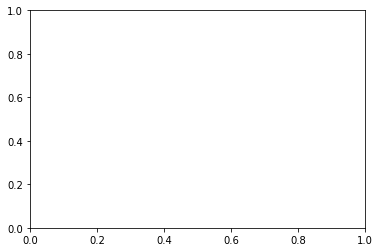

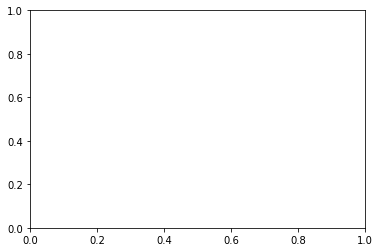

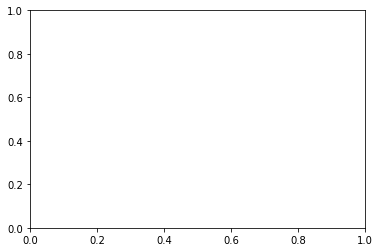

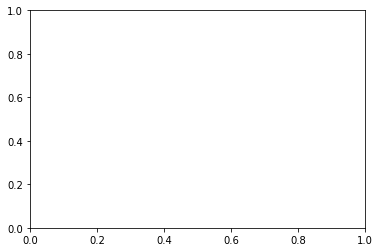

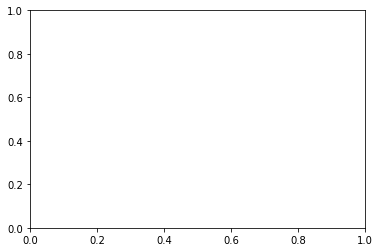

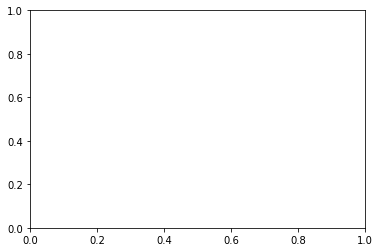

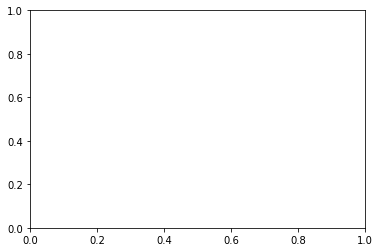

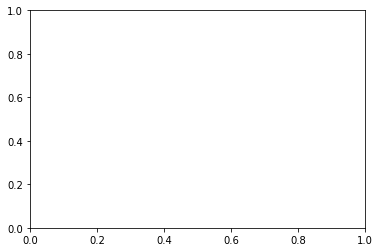

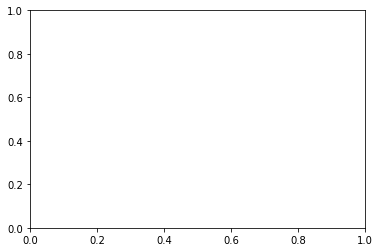

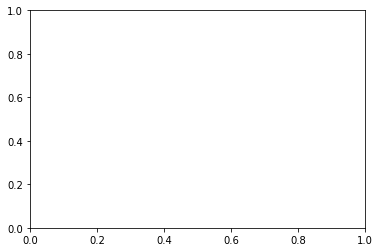

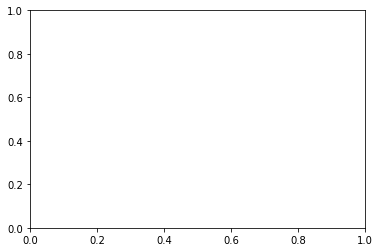

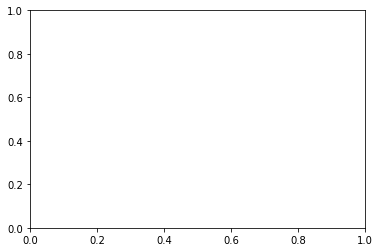

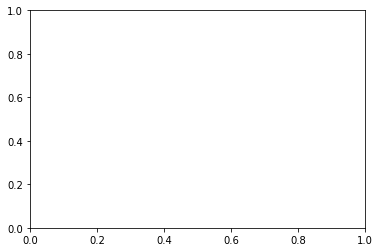

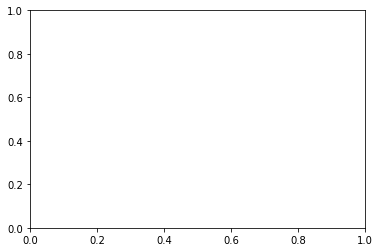

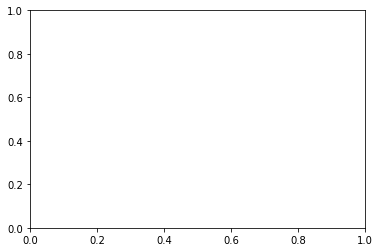

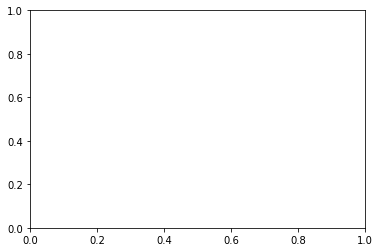

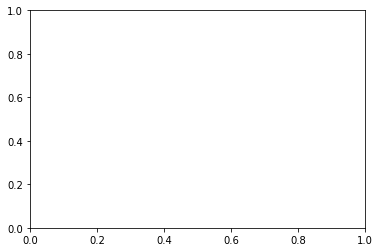

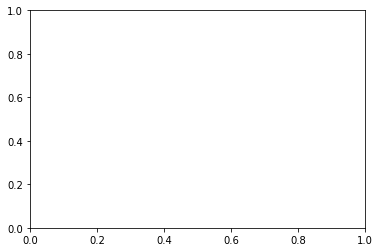

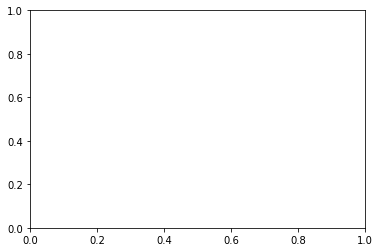

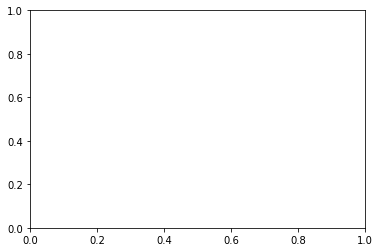

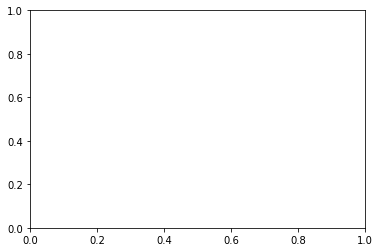

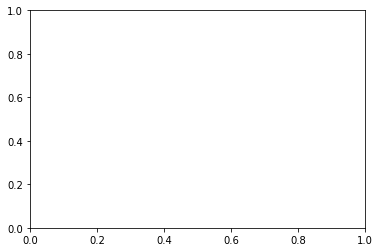

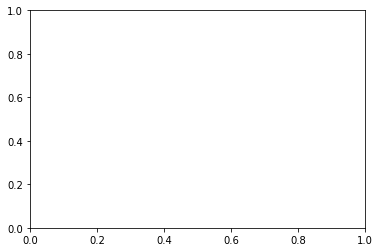

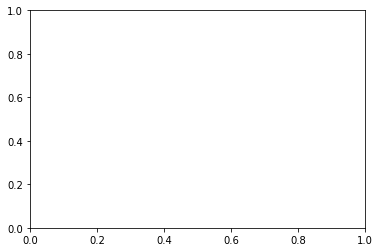

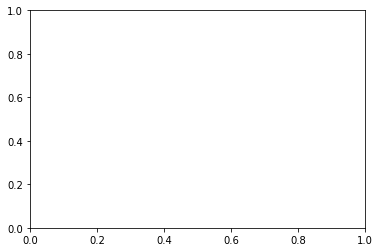

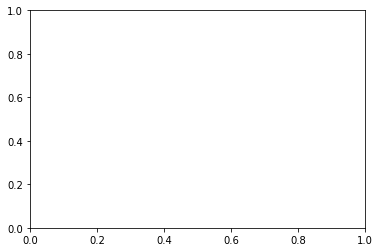

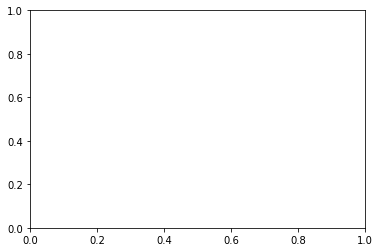

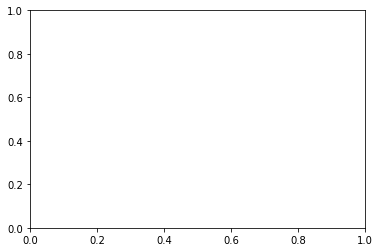

In [413]:
for i in files:
    ncdf_to_gif(i)

In [305]:
rootgrp = Dataset(files[1], "r", format="NETCDF4")

In [320]:
rootgrp.time_coverage_end.replace("-", "").replace(":", "")

'20200213T184259Z'

In [297]:
Time = {}
Time["start"] = rootgrp.time_coverage_start
Time["end"] = rootgrp.time_coverage_end
Time["create"] = rootgrp.date_created

geospatial = {}
geospatial["lat_min"] = rootgrp.geospatial_lat_min
geospatial["lat_max"] = rootgrp.geospatial_lat_max
geospatial["lon_min"] = rootgrp.geospatial_lon_min
geospatial["lon_max"] = rootgrp.geospatial_lon_max

AERO_340_380_precision = rootgrp.groups['PRODUCT'].variables['aerosol_index_340_380_precision'][:].data[0]
AERO_340_380 = rootgrp.groups['PRODUCT'].variables['aerosol_index_340_380'][:].data[0]
AERO_354_388_precision = rootgrp.groups['PRODUCT'].variables['aerosol_index_354_388_precision'][:].data[0]
AERO_354_388 = rootgrp.groups['PRODUCT'].variables['aerosol_index_354_388'][:].data[0]

latitude  = rootgrp.groups['PRODUCT'].variables['latitude'][:].data[0]
longitude = rootgrp.groups['PRODUCT'].variables['longitude'][:].data[0]



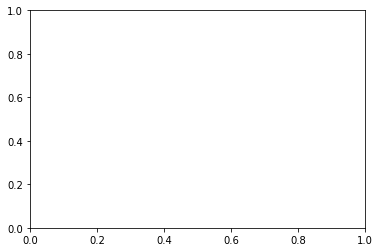

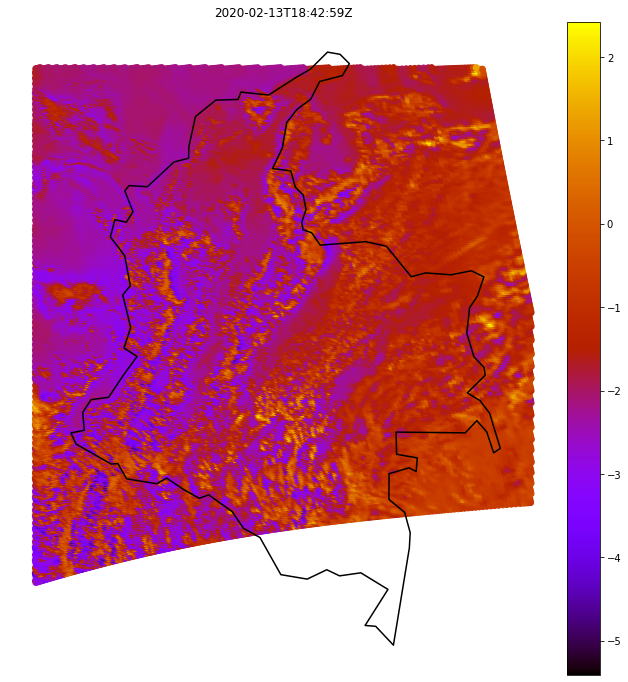

In [414]:

df = pd.DataFrame(
    {'Data' : np.hstack(AERO_340_380),
     'Presicion' : np.hstack(AERO_340_380_precision),
     'Latitude': np.hstack(latitude),
     'Longitude': np.hstack(longitude)
    })


gdf = geopandas.GeoDataFrame( df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf = gdf[gdf.Latitude > -5]
gdf = gdf[gdf.Latitude < 12]
gdf = gdf[gdf.Longitude > -80]
gdf = gdf[gdf.Longitude < -66]

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.


fig, axx = plt.subplots(1)

ax = world[world.name == "Colombia"].boundary.plot(
    color='black', edgecolor='black', figsize= (15,12),zorder=2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.1)

axx = gdf.plot(column='Data', ax=ax,  legend=True, cax=cax,zorder=1,cmap='gnuplot')
axx.set_axis_off()

axx.set_title(rootgrp.time_coverage_end )
axx.tick_params(labelsize=20)


In [419]:
help(axx)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner a

In [415]:
from PIL import Image, ImageDraw
import os



file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))

images = [Image.open(fn) for fn in file_names]


images[0].save('aerosol_index_340_380.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

PIL.Image.Image